In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr

In [2]:
level_5 = pd.read_csv('level5_beta_moa_performance.csv')
level_5['vae pvalue'] = - np.log(stats.norm.sf(-(level_5['vae zscore'])))

# level_5.loc[level_5['vae tstat'] > 0, 'vae pvalue'] = 1 - level_5['vae pvalue']
# level_5.loc[level_5['pca tstat'] > 0, 'pca pvalue'] = 1 - level_5['pca pvalue']

# level_5['vae pvalue']  = - np.log(level_5['vae pvalue'])
# level_5['pca pvalue']  = - np.log(level_5['pca pvalue'])



L1000 = pd.read_csv('../../L1000/3.application/L1000_beta_moa_performance.csv').rename(columns = {'vae pvalue': 'L1000'}).set_index('MOA')
L1000['L1000'] = - np.log(stats.norm.sf(-(L1000['vae zscore'])))
# L1000.loc[L1000['vae tstat'] > 0, 'L1000'] = 1 - L1000['L1000']
# L1000['L1000']  = - np.log(L1000['L1000'])


In [3]:
level_5 = level_5.set_index('MOA').reindex(index=L1000.index).rename(columns = {'vae pvalue': 'level 5'})

In [4]:
combined_df = pd.concat([level_5['level 5'], L1000['L1000']], axis = 1)
combined_df = combined_df.dropna()
# combined_df = combined_df[(np.abs(stats.zscore(combined_df['level 5'])) < 3)]
# combined_df = combined_df[(np.abs(stats.zscore(combined_df['L1000'])) < 3)]


In [5]:
sns.set_theme()

Text(0, 0.5, 'L1000 A|B prediction -log10 p value')

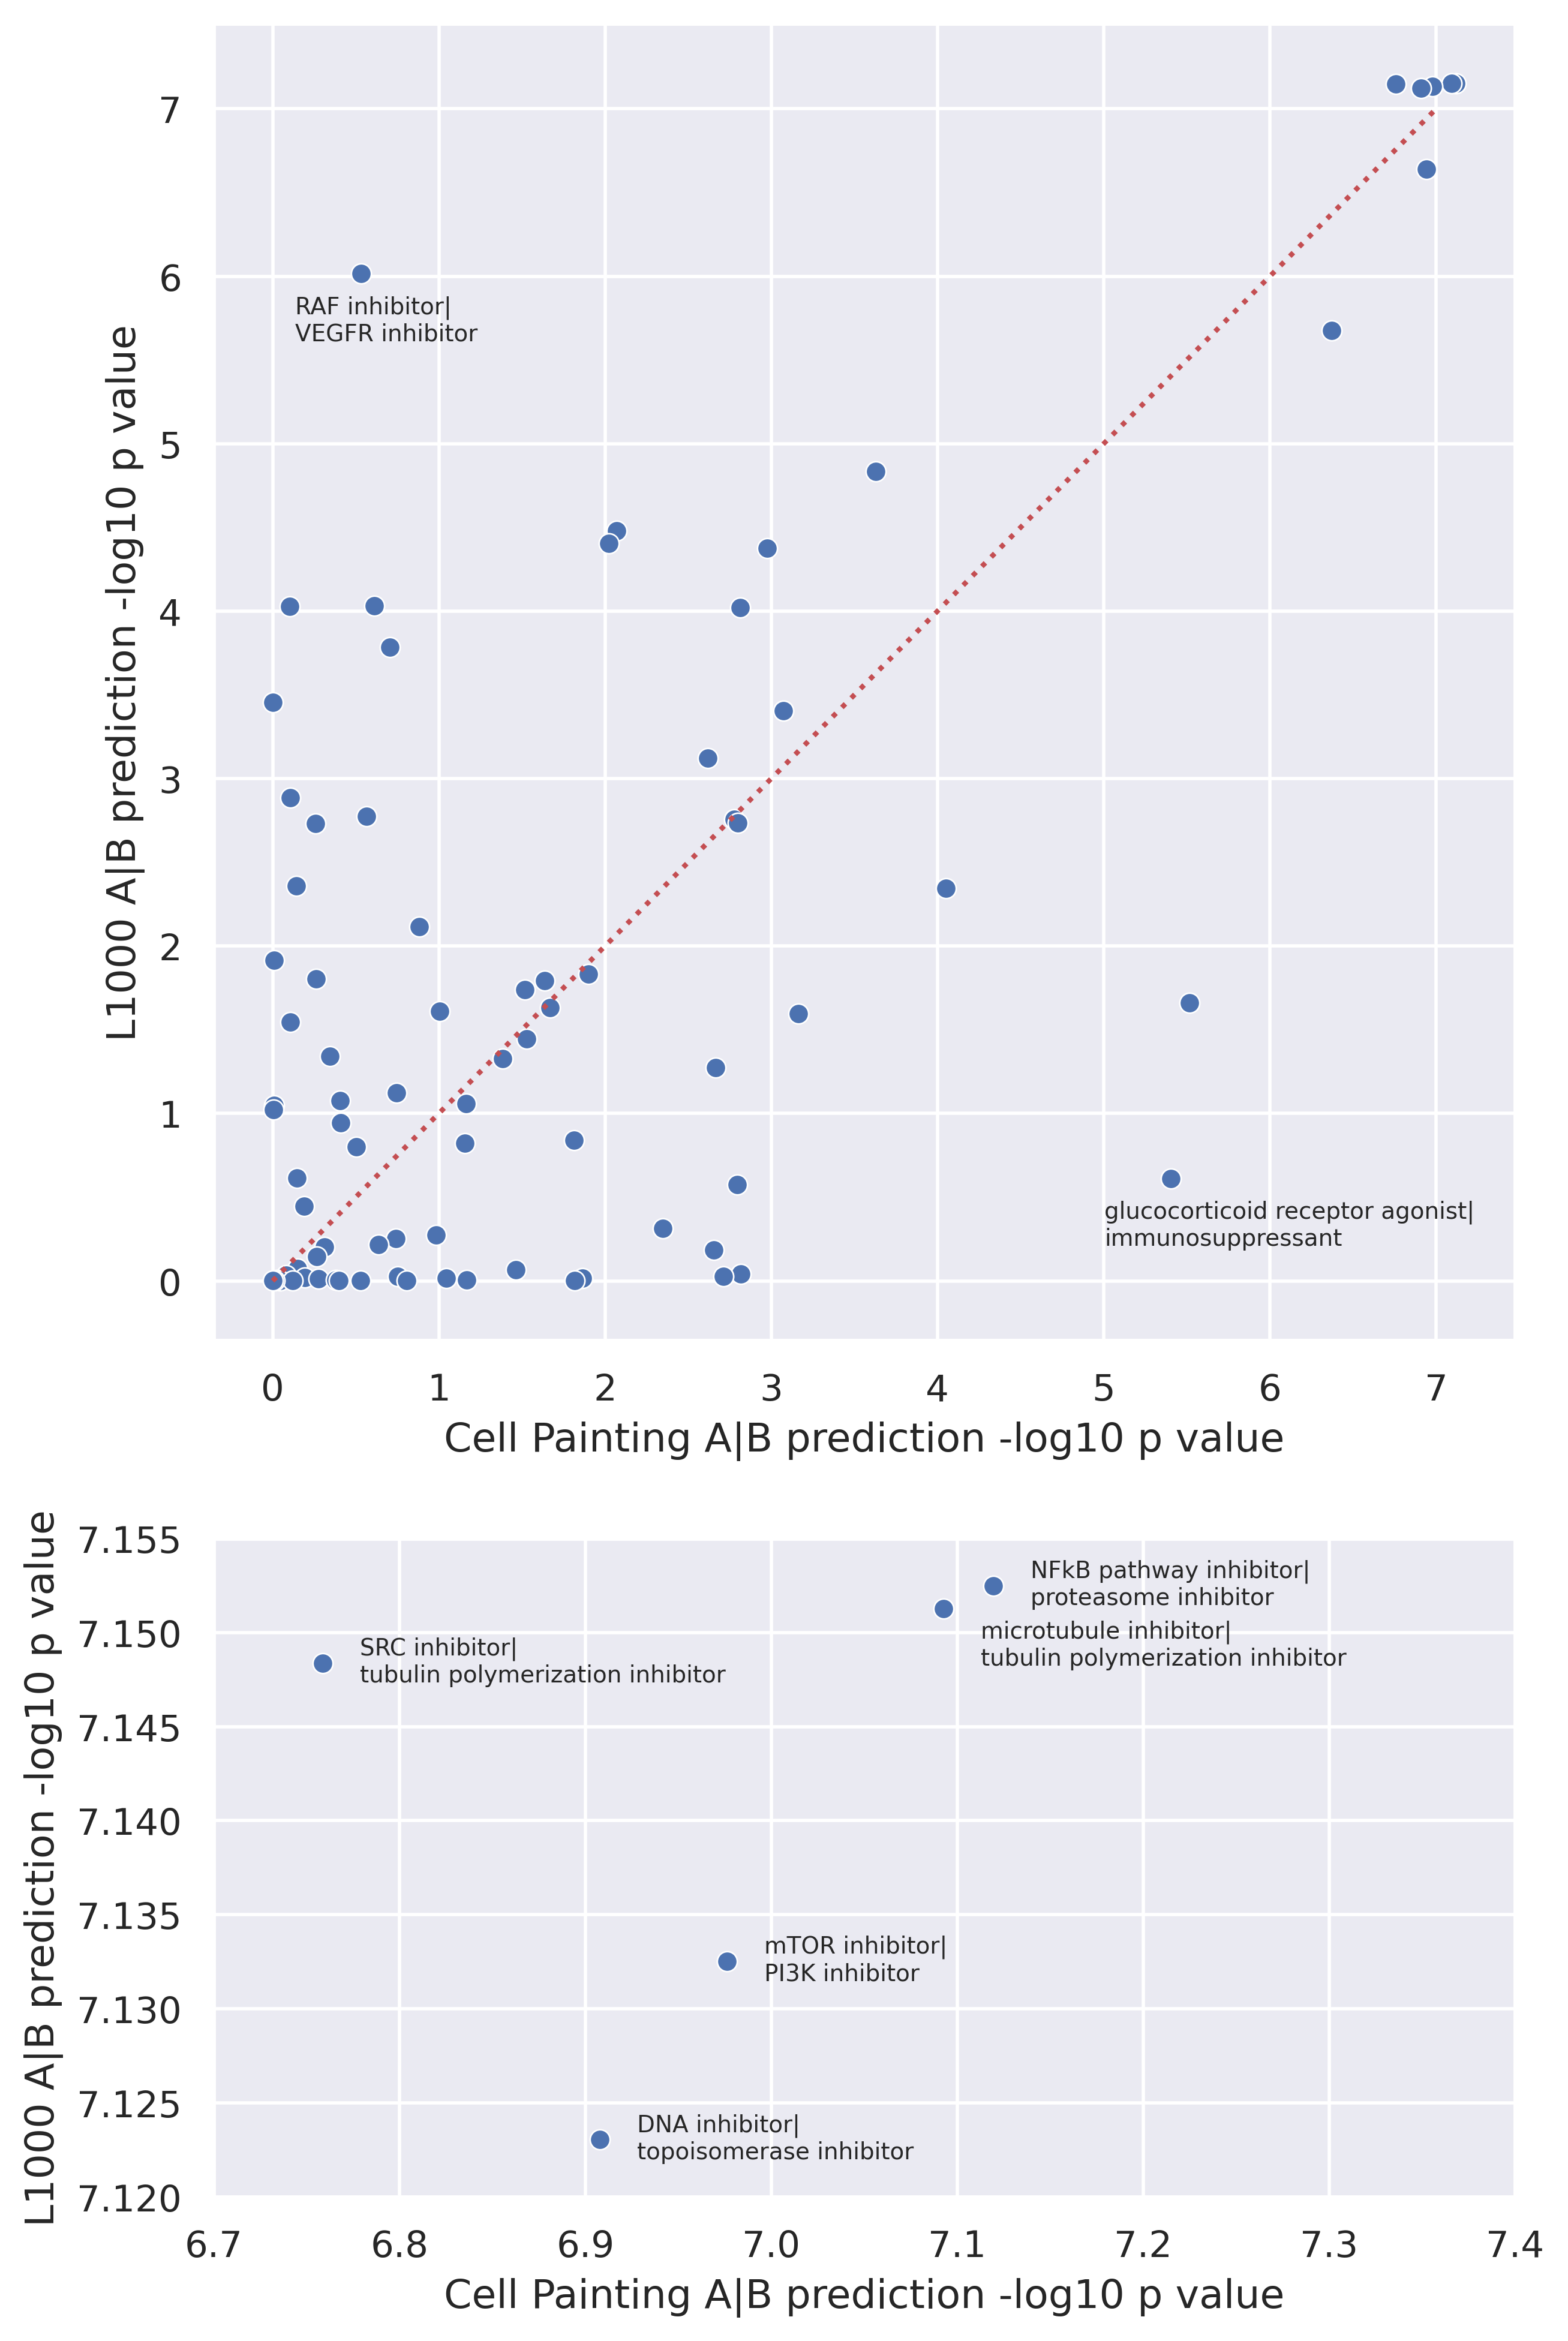

In [18]:

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(7, 12), dpi=400, gridspec_kw={'height_ratios': [2,1]})
# plt.xlim(-25, 60)
# plt.ylim(-100, 50)
m, b = np.polyfit(combined_df['level 5'], combined_df['L1000'], 1)

# plt.plot(combined_df['level 5'], m*combined_df['level 5'] + b, 'r')
ax1.plot(np.arange(0,8), np.arange(0,8), 'r:')

corr, _ = pearsonr(combined_df['level 5'], combined_df['L1000'])

label = "R^2 = " + str(round(corr**2, 2))
sns.scatterplot(ax=ax1, data = combined_df, x = 'level 5', y = 'L1000')
for moa, x, y in zip(combined_df.index, combined_df['level 5'], combined_df['L1000']):
    if (x > 5  and y < 1) or (x < 1 and y > 6):
        moa_formatted = moa.split('|')[0] + '|\n' + moa.split('|')[1]
        x_down = .4
        y_down = .4
#         if moa == "CDK inhibitor|glycogen synthase kinase inhibitor":
#             moa_formatted = "CDK inhibitor|\nglycogen synthase\nkinase inhibitor"
#             y_down = 3.5
#             x_down = 1.5
#         if moa == "EGFR inhibitor|protein tyrosine kinase inhibitor":
#             moa_formatted = "EGFR inhibitor|\nprotein tyrosine\nkinase inhibitor"
#             y_down = 3.5
#             x_down = 1.5
#         if moa == "aromatase inhibitor|TR2PV antagonist":
#             x_down = 3.5
        ax1.text(x = x-x_down, y = y-y_down,  s = moa_formatted, size = 7)
ax1.set_xlabel('Cell Painting A|B prediction -log10 p value')
ax1.set_ylabel('L1000 A|B prediction -log10 p value')

sns.scatterplot(ax=ax2, data = combined_df, x = 'level 5', y = 'L1000')
ax2.set_xlim(6.7,7.4)
ax2.set_ylim(7.12,7.155)

for moa, x, y in zip(combined_df.index, combined_df['level 5'], combined_df['L1000']):
    if x > 6.7  and y > 7.120:
        moa_formatted = moa.split('|')[0] + '|\n' + moa.split('|')[1]
        x_down = -.02
        y_down = .001
        if moa == "microtubule inhibitor|tubulin polymerization inhibitor":
            y_down = 0.003

        
        ax2.text(x = x-x_down, y = y-y_down,  s = moa_formatted, size = 7)
plt.xlabel('Cell Painting A|B prediction -log10 p value')
plt.ylabel('L1000 A|B prediction -log10 p value')


Text(0, 0.5, 'L1000 A|B prediction -log10 p value')

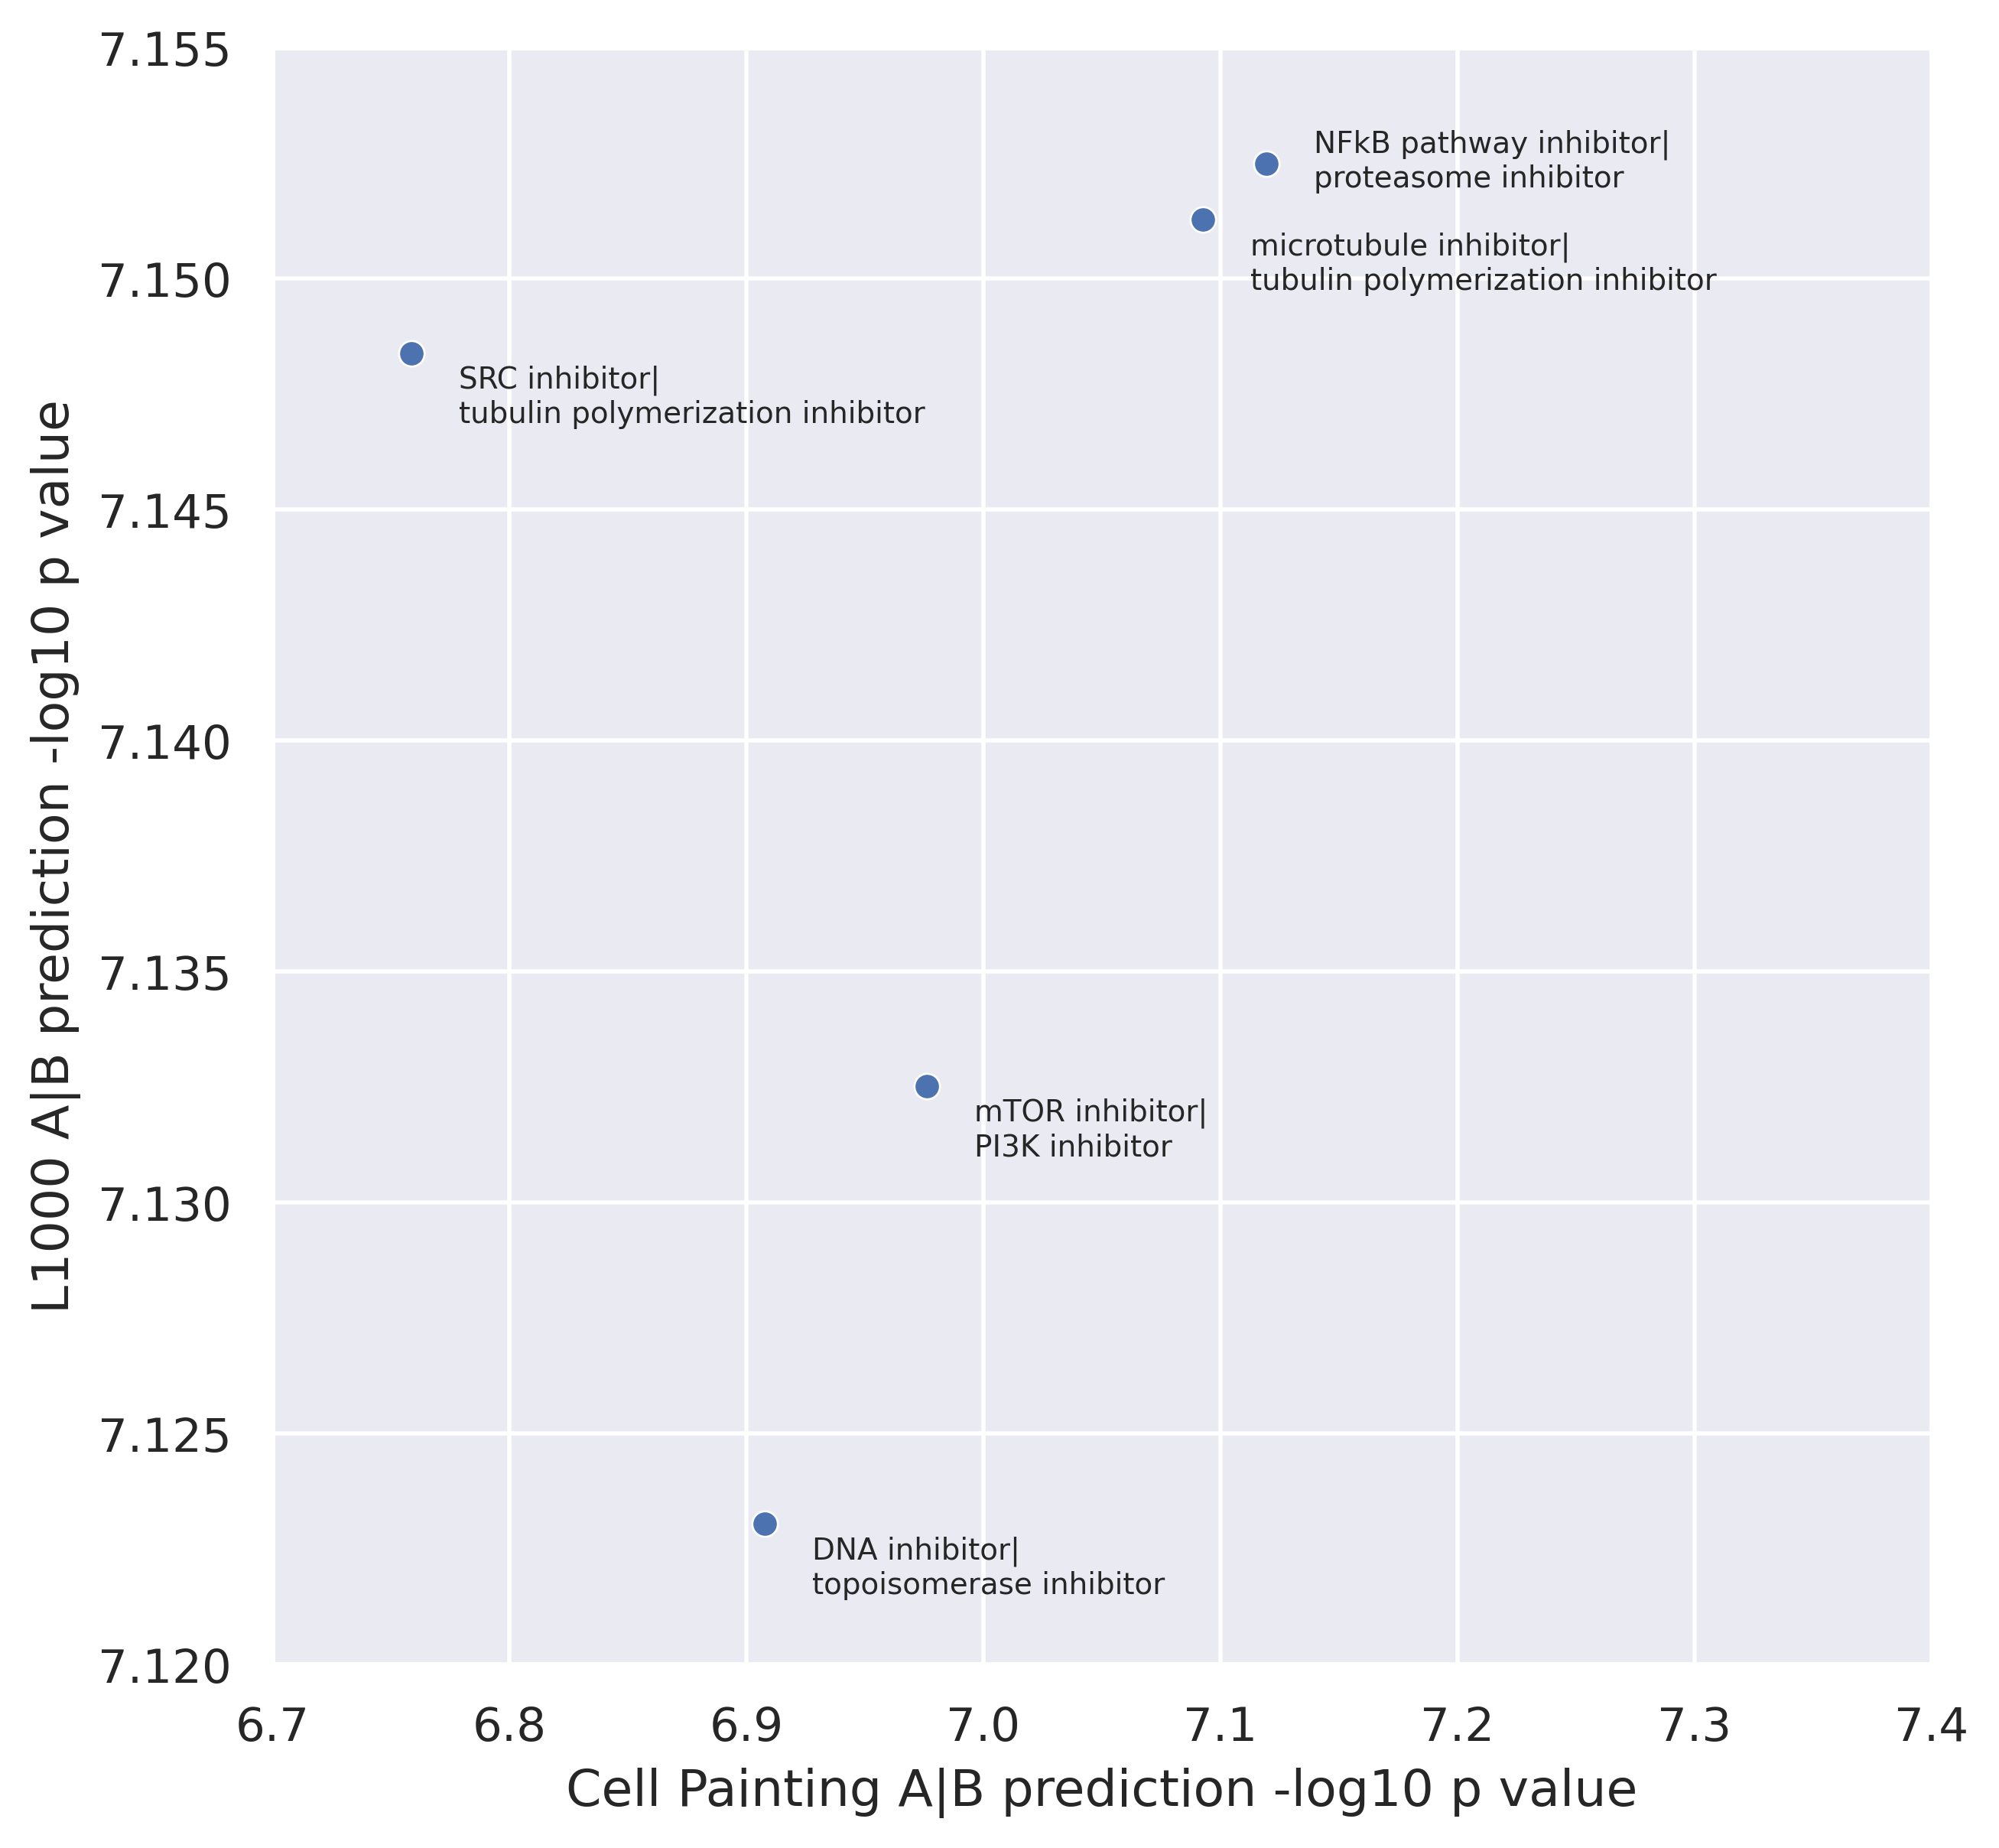

In [47]:
figure(figsize=(7, 7), dpi=400)
# plt.xlim(-25, 60)
# plt.ylim(-100, 50)
m, b = np.polyfit(combined_df['level 5'], combined_df['L1000'], 1)

# plt.plot(combined_df['level 5'], m*combined_df['level 5'] + b, 'r')
# corr, _ = pearsonr(combined_df['level 5'], combined_df['L1000'])

# label = "R^2 = " + str(round(corr**2, 2))
sns.scatterplot(data = combined_df, x = 'level 5', y = 'L1000')
plt.xlim(6.7,7.4)
plt.ylim(7.12,7.155)

for moa, x, y in zip(combined_df.index, combined_df['level 5'], combined_df['L1000']):
    if x > 6.7  and y > 7.120:
        moa_formatted = moa.split('|')[0] + '|\n' + moa.split('|')[1]
        x_down = -.02
        y_down = .0015
        if moa == "NFkB pathway inhibitor|proteasome inhibitor":
#             moa_formatted = "CDK inhibitor|\nglycogen synthase\nkinase inhibitor"
            y_down = 0.0005
#             x_down = 1.5
#         if moa == "EGFR inhibitor|protein tyrosine kinase inhibitor":
#             moa_formatted = "EGFR inhibitor|\nprotein tyrosine\nkinase inhibitor"
#             y_down = 3.5
#             x_down = 1.5
#         if moa == "aromatase inhibitor|TR2PV antagonist":
#             x_down = 3.5
        
        plt.text(x = x-x_down, y = y-y_down,  s = moa_formatted, size = 7)
plt.xlabel('Cell Painting A|B prediction -log10 p value')
plt.ylabel('L1000 A|B prediction -log10 p value')

# plt.legend()


In [48]:
level_5

,Unnamed: 0,vae zscore,pca zscore,moa similarity,level 5
MOA,,,,,
NFkB pathway inhibitor|proteasome inhibitor,0.0,-3.152561,-2.860136,5.111749,7.119434
microtubule inhibitor|tubulin polymerization inhibitor,17.0,-3.144751,-2.908896,5.388521,7.092711
SRC inhibitor|tubulin polymerization inhibitor,79.0,-3.045737,-2.816254,4.022180,6.758859
mTOR inhibitor|PI3K inhibitor,3.0,-3.110497,-2.873185,2.238932,6.976180
DNA inhibitor|topoisomerase inhibitor,46.0,-3.090222,-2.892930,3.116495,6.907720
...,...,...,...,...,...
FGFR inhibitor|VEGFR inhibitor,5.0,1.208678,0.416734,0.665789,0.120354
benzodiazepine receptor agonist|HDAC inhibitor,74.0,0.441725,2.488274,1.078809,0.399499
EGFR inhibitor|protein tyrosine kinase inhibitor,42.0,2.276039,2.243712,1.127175,0.011488


In [27]:
level_5 = pd.read_csv('level5_beta_moa_performance.csv')
# level_5[level_5['pca tstat']<0]
level_5.sort_values('vae tstat').head(40)


,Unnamed: 0,MOA,vae pvalue,vae tstat,pca pvalue,pca tstat
34,34,AKT inhibitor|mTOR inhibitor,8.185149e-20,-340.905552,1.915215e-12,-51.663739
82,82,CDK inhibitor|glycogen synthase kinase inhibitor,8.801667e-16,-121.501137,3.467183e-12,-48.356191
4,4,EGFR inhibitor|protein tyrosine kinase inhibitor,7.802924e-14,-73.784359,3.482720e-09,-22.290363
20,20,benzodiazepine receptor agonist|HDAC inhibitor,2.016702e-12,-51.367282,1.037810e-12,-55.314270
10,10,FGFR inhibitor|VEGFR inhibitor,1.740236e-11,-40.390239,8.676867e-07,-11.832769
25,25,adrenergic receptor agonist|imidazoline recept...,7.433591e-10,-26.526298,1.908225e-04,-6.048555
56,56,histamine receptor antagonist|platelet activat...,8.286991e-10,-26.204190,8.345212e-07,-11.887099
45,45,DNA directed DNA polymerase inhibitor|thymidyl...,3.608112e-08,-17.094405,1.635180e-01,1.517235
17,17,11-beta hydroxysteroid dehydrogenase inhibitor...,1.200009e-07,-14.893631,2.133818e-03,-4.252747
28,28,potassium channel blocker|sodium channel blocker,1.476211e-07,-14.542134,8.093673e-08,-15.583790
